In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# importing all 3 parts of the dataset
df_train = pd.read_excel('2018-E-c-Ar-train.xlsx')
df_test = pd.read_excel('2018-E-c-Ar-test-gold.xlsx')
df_dev = pd.read_excel('2018-E-c-Ar-dev.xlsx')

In [31]:
# merging all 3 into one df
df = pd.concat([df_dev,df_test,df_train])

In [54]:
#null values
df.notnull().sum()

ID              4381
Tweet           4375
anger           4381
anticipation    4381
disgust         4381
fear            4381
joy             4381
love            4381
optimism        4381
pessimism       4381
sadness         4381
surprise        4381
trust           4381
sum             4381
len             4375
dtype: int64

In [58]:
df = df.dropna()
df.notnull().sum()

ID              4375
Tweet           4375
anger           4375
anticipation    4375
disgust         4375
fear            4375
joy             4375
love            4375
optimism        4375
pessimism       4375
sadness         4375
surprise        4375
trust           4375
sum             4375
len             4375
dtype: int64

In [59]:
df.dtypes

ID               object
Tweet            object
anger             int64
anticipation      int64
disgust           int64
fear              int64
joy               int64
love              int64
optimism          int64
pessimism         int64
sadness           int64
surprise          int64
trust             int64
sum               int64
len             float64
dtype: object

In [60]:
# adding a col with the sum of the emotions
df['sum'] = df['anger'] +df['anticipation'] +df['disgust']+df['fear'] +df['joy'] +df['love'] +df['optimism'] +df['pessimism'] +df['sadness'] +df['surprise'] +df['trust']

df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,sum,len
0,2018-Ar-00289,باقي ١٠ دقايق واخلص حلقة سكول الثانيه بس النت ...,1,0,1,0,1,0,0,1,0,0,0,4,54.0
1,2018-Ar-02519,معاناة لما يكون دايماً إحساسك بمحله .....,0,0,0,0,0,0,0,0,1,0,0,1,41.0
2,2018-Ar-01952,لو فيه جائزه اكثر موسوسه تخاف من الامراض فزت ب...,0,0,0,1,0,0,0,1,0,0,0,2,59.0
3,2018-Ar-02912,ما يستفز راحة البال إلا الذكريات ☹️ 💔,1,0,0,0,0,0,0,0,1,0,0,2,37.0
4,2018-Ar-02756,القلب ياوقت والنفس ماهي مرتاحه ونبض القلب ماهو...,0,0,0,1,0,0,0,0,1,0,0,2,86.0


<AxesSubplot:>

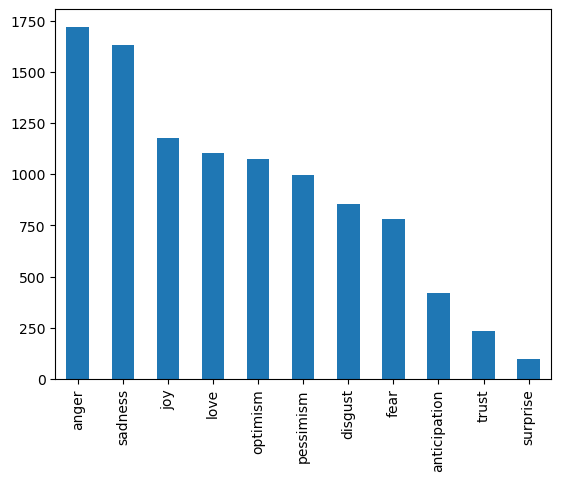

In [67]:
# plotting a bar graph showing the count of each emotion in the dataset
df[['anger','sadness','joy','love','optimism','pessimism','disgust','fear','anticipation','trust','surprise']].sum().plot.bar()

<AxesSubplot:xlabel='sum', ylabel='count'>

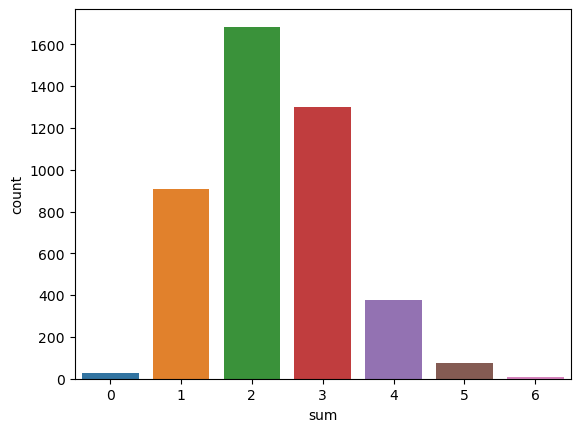

In [62]:
# number of emotions per tweet
sns.countplot(x=df['sum'])

In [63]:
df['len'] = df.Tweet.str.len()
df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,sum,len
0,2018-Ar-00289,باقي ١٠ دقايق واخلص حلقة سكول الثانيه بس النت ...,1,0,1,0,1,0,0,1,0,0,0,4,54
1,2018-Ar-02519,معاناة لما يكون دايماً إحساسك بمحله .....,0,0,0,0,0,0,0,0,1,0,0,1,41
2,2018-Ar-01952,لو فيه جائزه اكثر موسوسه تخاف من الامراض فزت ب...,0,0,0,1,0,0,0,1,0,0,0,2,59
3,2018-Ar-02912,ما يستفز راحة البال إلا الذكريات ☹️ 💔,1,0,0,0,0,0,0,0,1,0,0,2,37
4,2018-Ar-02756,القلب ياوقت والنفس ماهي مرتاحه ونبض القلب ماهو...,0,0,0,1,0,0,0,0,1,0,0,2,86


<AxesSubplot:xlabel='len', ylabel='sum'>

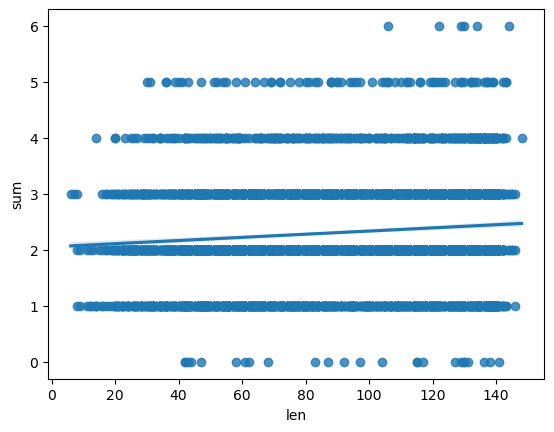

In [65]:
# attempting to find a relation between tweet length and number of emotions, none found.
sns.regplot(x=df['len'],y=df['sum'])